# Day 3: Simpson's Paradox (The "Gym Paradox")
**Author:** Gaurav Dhangar  
**Topic:** Statistics, Confounding Variables, & Bias  

### The Scenario
We have health data for 1,000 people.  
We want to answer a simple question: **"Does going to the gym improve your health?"**

**The Problem:**
When we first plot the data, it looks like **more exercise = higher health risk**.
Is the gym killing people? Or is the data lying?

Let's find the hidden variable.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

## Load dataset

In [9]:
df = pd.read_csv("gym_health_paradox.csv")
df.head()

,Exercise_Hours,Health_Risk,Group
0,5.444104,72.114930,Rehab
1,7.609138,69.866877,Rehab
2,3.538037,27.953239,Healthy
3,6.343106,66.427348,Rehab
4,2.504987,23.115570,Healthy


##  Step 1: The "Lie" (Naive Analysis)
Imagine you are a Data Scientist who **forgot to ask about the patient's history.**
You simply plot `Exercise` vs. `Health Risk`.

**What we expect:** A downward slope (More Gym = Less Risk).
**What we get:** 

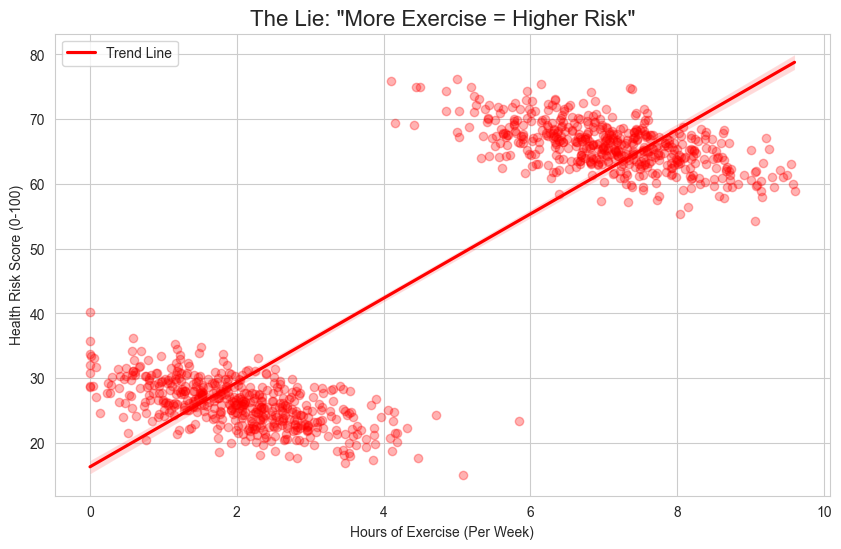

In [11]:
plt.figure(figsize=(10, 6))

# Plot regression line IGNORING the group
sns.regplot(data=df, x='Exercise_Hours', y='Health_Risk', color='red', 
            scatter_kws={'alpha':0.3}, line_kws={'label': 'Trend Line'})

plt.title('The Lie: "More Exercise = Higher Risk"', fontsize=16)
plt.xlabel('Hours of Exercise (Per Week)')
plt.ylabel('Health Risk Score (0-100)')
plt.legend()
plt.show()

## Step 2: The Truth (The Reveal)
That red line is statistically correct, but logically **wrong**.
It suggests that for every extra hour you exercise, your health gets *worse*.

**The Hidden Variable:**
We forgot to account for **who** is exercising.
* **Healthy People:** Exercise a little.
* **Rehab Patients:** Exercise A LOT (prescribed therapy), but they are already sick.

Let's split the data by `Group`.

<Figure size 1000x600 with 0 Axes>

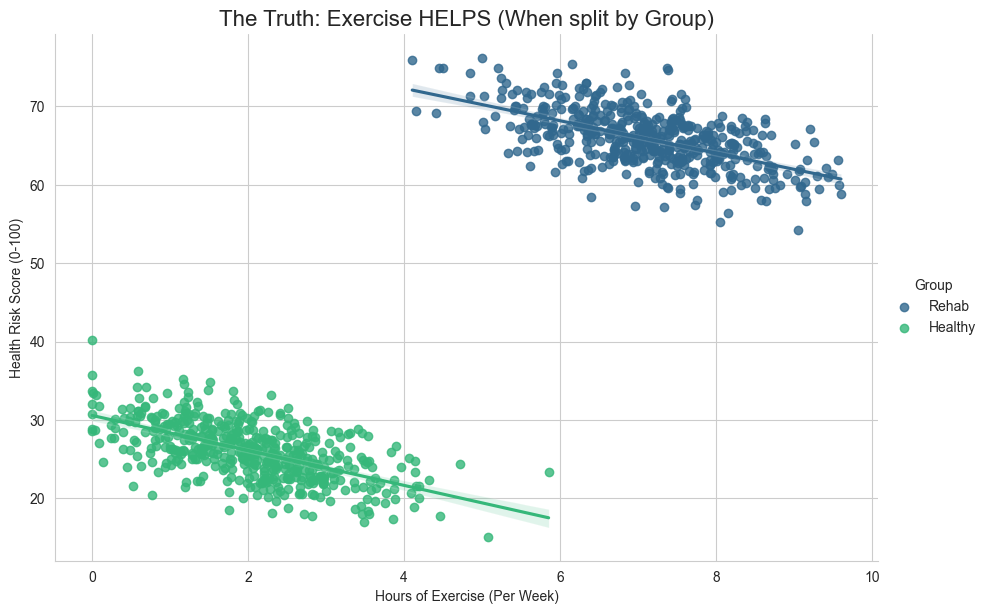

In [12]:
plt.figure(figsize=(10, 6))

# Plot regression lines SEPARATED by group
sns.lmplot(data=df, x='Exercise_Hours', y='Health_Risk', hue='Group', 
           height=6, aspect=1.5, palette='viridis')

plt.title('The Truth: Exercise HELPS (When split by Group)', fontsize=16)
plt.xlabel('Hours of Exercise (Per Week)')
plt.ylabel('Health Risk Score (0-100)')
plt.show()

## 📊 Step 3: The Mathematical Proof
Visuals are nice, but let's check the **Correlation Coefficient**.

* **Positive Correlation (+)** = Variables move together (Bad in this case).
* **Negative Correlation (-)** = Variables move opposite (Good in this case).

Watch the numbers flip! 🔄

In [13]:
# 1. The "Lie" (Overall Data)
overall_corr = df['Exercise_Hours'].corr(df['Health_Risk'])
print(f" Correlation (Combined): {overall_corr:.2f} (Looks like Gym is BAD)")

# 2. The "Truth" (Grouped Data)
grouped_corr = df.groupby('Group')[['Exercise_Hours', 'Health_Risk']].corr().iloc[0::2, -1]
print("\n Correlation (By Group):")
print(grouped_corr)
print("\n(Both groups are Negative -> Gym is GOOD)")

 Correlation (Combined): 0.88 (Looks like Gym is BAD)

 Correlation (By Group):
Group                  
Healthy  Exercise_Hours   -0.592057
Rehab    Exercise_Hours   -0.577091
Name: Health_Risk, dtype: float64

(Both groups are Negative -> Gym is GOOD)


## Lesson Learned
This is **Simpson's Paradox**. 
A trend appears in different groups of data but **disappears or reverses** when these groups are combined.

**The ML Lesson:**
If you train a model without the `Group` feature, it will learn that Exercise is dangerous.
Always look for **Confounding Variables**!